# Dependencies

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import seaborn as sns
import math
import statistics
import scipy.stats

# Files

In [73]:
path_students= os.path.join('..', 'Light networks', 'students.csv')
path_schools= os.path.join('..', 'Light networks', 'schools.csv')

students=pd.read_csv(path_students,low_memory=False,encoding='utf-8-sig')
schools=pd.read_csv(path_schools,low_memory=False,encoding='utf-8-sig')


In [74]:
students.head()

,REGION,LEVEL,STATE,TYPE,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,NORTH CENTER,ELEMENTARY,AGUASCALIENTES,PUBLIC,145740,144735,143571,142512,141740,141221,141712,142523
1,NORTH CENTER,ELEMENTARY,AGUASCALIENTES,PRIVATE,14516,14715,14746,15282,15837,16146,17120,17596
2,NORTH CENTER,JR HIGH,AGUASCALIENTES,PUBLIC,67155,68699,69866,69111,68248,67568,66148,66356
3,NORTH CENTER,JR HIGH,AGUASCALIENTES,PRIVATE,5266,5557,5828,6016,6225,6314,6969,7188
4,NORTH CENTER,HIGH SCHOOL,AGUASCALIENTES,PUBLIC,36858,37863,40941,43954,45753,47220,46364,47163


In [75]:
schools.head()

,REGION,LEVEL,STATE,TYPE,1991-1992,1992-1993,1993-1994,1994-1995,1995-1996,1996-1997,...,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,NORTH CENTER,UNIVERSITY,AGUASCALIENTES,PRIVATE,4,4,4,7,7,7,...,17,18,21,18,23,28,28,26,35,36
1,NORTH CENTER,UNIVERSITY,AGUASCALIENTES,PUBLIC,8,9,9,12,14,15,...,20,22,18,27,24,24,19,19,26,26
2,NORTH CENTER,HIGH SCHOOL,AGUASCALIENTES,PRIVATE,27,31,30,40,41,42,...,72,73,75,77,110,108,106,107,114,110
3,NORTH CENTER,HIGH SCHOOL,AGUASCALIENTES,PUBLIC,30,29,30,32,35,48,...,86,87,92,103,120,170,202,224,192,193
4,NORTH CENTER,ELEMENTARY,AGUASCALIENTES,PRIVATE,43,50,60,61,64,65,...,98,94,93,96,95,97,98,100,97,102


In [76]:
#schools.info()
#students.info()

# ORGANIZE TABLES

In [77]:
schools_2012_2020= schools[["REGION","LEVEL","STATE","TYPE","2012-2013","2013-2014","2014-2015","2015-2016","2016-2017","2017-2018","2018-2019","2019-2020"]]


In [78]:
schools_groupby=schools_2012_2020.groupby(["REGION","LEVEL","TYPE"],as_index=False).sum()
schools_groupby.head()


,REGION,LEVEL,TYPE,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,CENTER,ELEMENTARY,PRIVATE,4080,4097,4125,4166,4206,4224,4252,4161
1,CENTER,ELEMENTARY,PUBLIC,23062,22979,22832,22695,22622,22407,22263,22263
2,CENTER,HIGH SCHOOL,PRIVATE,2370,2377,2639,2587,2547,2572,2614,2123
3,CENTER,HIGH SCHOOL,PUBLIC,3352,3549,3720,4457,5080,5161,5429,5429
4,CENTER,JR HIGH,PRIVATE,1935,1980,2032,2093,2120,2177,2180,2300


In [79]:
students_groupby=students.groupby(["REGION","LEVEL","TYPE"],as_index=False).sum()
students_groupby.head()

,REGION,LEVEL,TYPE,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,CENTER,ELEMENTARY,PRIVATE,625387,629395,619675,625422,632123,635527,654514,649720
1,CENTER,ELEMENTARY,PUBLIC,5316003,5251708,5144795,5096026,5025487,4967041,4920297,4865778
2,CENTER,HIGH SCHOOL,PRIVATE,380414,436911,425351,432228,439786,449177,456062,435629
3,CENTER,HIGH SCHOOL,PUBLIC,1476735,1507015,1588534,1664632,1712859,1776690,1780521,1788406
4,CENTER,JR HIGH,PRIVATE,247698,259539,272517,279836,281649,275624,281206,281542


In [80]:
schools_20192020= schools_groupby[["REGION","LEVEL","TYPE","2019-2020"]]
schools_fv=schools_20192020.groupby(["LEVEL","TYPE"],as_index=False).sum()
schools_fv

,LEVEL,TYPE,2019-2020
0,ELEMENTARY,PRIVATE,10258
1,ELEMENTARY,PUBLIC,87142
2,HIGH SCHOOL,PRIVATE,6393
3,HIGH SCHOOL,PUBLIC,14962
4,JR HIGH,PRIVATE,5592
5,JR HIGH,PUBLIC,33874
6,UNIVERSITY,PRIVATE,2986
7,UNIVERSITY,PUBLIC,1916


In [81]:
students_20192020= students_groupby[["REGION","LEVEL","TYPE","2019-2020"]]
students_fv=students_20192020.groupby(["LEVEL","TYPE"],as_index=False).sum()
students_fv

,LEVEL,TYPE,2019-2020
0,ELEMENTARY,PRIVATE,1376933
1,ELEMENTARY,PUBLIC,12485473
2,HIGH SCHOOL,PRIVATE,934052
3,HIGH SCHOOL,PUBLIC,4211125
4,JR HIGH,PRIVATE,615734
5,JR HIGH,PUBLIC,5837791
6,UNIVERSITY,PRIVATE,1220134
7,UNIVERSITY,PUBLIC,2841510


# public and private by educational level

In [82]:
import plotly.express as px
df = students_fv
fig = px.treemap(df, path=[px.Constant("Students"), 'LEVEL',"TYPE"], 
                 values='2019-2020', color='LEVEL')
fig.update_layout(margin = dict(t=50, l=30, r=50, b=25))
fig.show()

In [83]:
import plotly.express as px
df = schools_fv
fig = px.treemap(df, path=[px.Constant("Schools"), 'LEVEL',"TYPE"], 
                 values='2019-2020', color='LEVEL')
fig.update_layout(margin = dict(t=50, l=30, r=50, b=25))
fig.show()

# private

In [84]:
#HIGHSCHOOL
students_private=students_20192020[(students_20192020["LEVEL"]== "HIGH SCHOOL") & (students_20192020["TYPE"]=="PRIVATE")]
schools_private=schools_20192020[(schools_20192020["LEVEL"]== "HIGH SCHOOL") & (schools_20192020["TYPE"]=="PRIVATE")]
df_merge_hs=students_private.merge(schools_private,on="REGION",how="left")
df_merge_hs["students per school"]=df_merge_hs["2019-2020_x"]/df_merge_hs["2019-2020_y"]
df_m_hs=df_merge_hs[["REGION","2019-2020_x","2019-2020_y","students per school"]]
df_m_hs

,REGION,2019-2020_x,2019-2020_y,students per school
0,CENTER,435629,2123,205.20
1,NORTH,184539,1503,122.78
2,NORTH CENTER,199769,1697,117.72
3,SOUTH,114115,1070,106.65


In [85]:
#UNIVERSITY

students_private=students_20192020[(students_20192020["LEVEL"]== "UNIVERSITY") & (students_20192020["TYPE"]=="PRIVATE")]
schools_private=schools_20192020[(schools_20192020["LEVEL"]== "UNIVERSITY") & (schools_20192020["TYPE"]=="PRIVATE")]
df_merge_university=students_private.merge(schools_private,on="REGION",how="left")
df_merge_university["students per school"]=df_merge_university["2019-2020_x"]/df_merge_university["2019-2020_y"]
df_m_u=df_merge_university[["REGION","2019-2020_x","2019-2020_y","students per school"]]
df_m_u



,REGION,2019-2020_x,2019-2020_y,students per school
0,CENTER,665066,1140,583.39
1,NORTH,207958,573,362.93
2,NORTH CENTER,182751,690,264.86
3,SOUTH,164359,583,281.92


In [86]:
#students & school statistics

In [87]:
stuednts_uni=students[(students["LEVEL"]== "UNIVERSITY") & (students["TYPE"]=="PRIVATE")]
stuednts_uni.describe()

,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,27366.78,28185.25,28095.19,29152.53,30438.12,31232.22,36568.94,38129.19
std,35592.75,37795.72,36924.87,37187.78,39230.38,40283.66,46241.97,47255.26
min,2433.00,2451.00,2299.00,1905.00,1756.00,1584.00,1775.00,2068.00
25%,6691.50,7481.25,7845.25,7840.25,7843.50,8350.75,10340.50,11338.00
50%,14896.00,15092.50,14798.00,16283.50,17138.50,17678.00,19580.50,19944.00
75%,25236.50,26408.25,28814.25,30254.00,31047.25,32040.00,37790.00,41187.75
max,150851.00,164130.00,155734.00,153518.00,164588.00,167420.00,187694.00,190905.00


In [88]:
stuednts_HS=students[(students["LEVEL"]== "HIGH SCHOOL") & (students["TYPE"]=="PRIVATE")]
stuednts_HS.describe()

,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,24117.25,29025.91,28323.91,28995.41,30089.16,31163.09,31171.09,29189.12
std,22459.32,26084.84,25267.57,25565.25,26363.94,27063.36,27218.17,25758.88
min,2411.00,2419.00,2393.00,2679.00,2919.00,2962.00,2975.00,2804.00
25%,7911.50,8403.00,8824.75,9037.25,8891.50,9389.75,10192.00,10254.00
50%,15490.50,17460.00,18404.00,19724.50,20039.50,20218.00,20459.00,20213.50
75%,32081.75,40563.75,40788.50,39518.00,42350.75,42867.00,43033.75,39627.00
max,87689.00,104069.00,102819.00,99945.00,104985.00,104916.00,113263.00,112009.00


In [89]:
schools.head()

,REGION,LEVEL,STATE,TYPE,1991-1992,1992-1993,1993-1994,1994-1995,1995-1996,1996-1997,...,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,NORTH CENTER,UNIVERSITY,AGUASCALIENTES,PRIVATE,4,4,4,7,7,7,...,17,18,21,18,23,28,28,26,35,36
1,NORTH CENTER,UNIVERSITY,AGUASCALIENTES,PUBLIC,8,9,9,12,14,15,...,20,22,18,27,24,24,19,19,26,26
2,NORTH CENTER,HIGH SCHOOL,AGUASCALIENTES,PRIVATE,27,31,30,40,41,42,...,72,73,75,77,110,108,106,107,114,110
3,NORTH CENTER,HIGH SCHOOL,AGUASCALIENTES,PUBLIC,30,29,30,32,35,48,...,86,87,92,103,120,170,202,224,192,193
4,NORTH CENTER,ELEMENTARY,AGUASCALIENTES,PRIVATE,43,50,60,61,64,65,...,98,94,93,96,95,97,98,100,97,102


In [90]:
schools_uni=schools[(schools["LEVEL"]== "UNIVERSITY") & (schools["TYPE"]=="PRIVATE")]
schools_uni["2019-2020"].describe()

count    32.00
mean     93.31
std      75.31
min      14.00
25%      36.00
50%      66.00
75%     131.75
max     256.00
Name: 2019-2020, dtype: float64

In [91]:
schools_hs=schools[(schools["LEVEL"]== "HIGH SCHOOL") & (schools["TYPE"]=="PRIVATE")]
schools_hs["2019-2020"].describe()

count    32.00
mean    199.78
std     151.74
min      32.00
25%      82.00
50%     139.00
75%     268.50
max     603.00
Name: 2019-2020, dtype: float64

# time series forecast

In [92]:
#technique
#timeseries schools  --->https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [93]:
schools.head()

,REGION,LEVEL,STATE,TYPE,1991-1992,1992-1993,1993-1994,1994-1995,1995-1996,1996-1997,...,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,NORTH CENTER,UNIVERSITY,AGUASCALIENTES,PRIVATE,4,4,4,7,7,7,...,17,18,21,18,23,28,28,26,35,36
1,NORTH CENTER,UNIVERSITY,AGUASCALIENTES,PUBLIC,8,9,9,12,14,15,...,20,22,18,27,24,24,19,19,26,26
2,NORTH CENTER,HIGH SCHOOL,AGUASCALIENTES,PRIVATE,27,31,30,40,41,42,...,72,73,75,77,110,108,106,107,114,110
3,NORTH CENTER,HIGH SCHOOL,AGUASCALIENTES,PUBLIC,30,29,30,32,35,48,...,86,87,92,103,120,170,202,224,192,193
4,NORTH CENTER,ELEMENTARY,AGUASCALIENTES,PRIVATE,43,50,60,61,64,65,...,98,94,93,96,95,97,98,100,97,102


# schools university

In [94]:
schools_TS=schools[(schools["LEVEL"]== "UNIVERSITY") & (schools["TYPE"]=="PRIVATE")]
schools_TS.head()
TS_I=schools_TS.groupby("REGION",as_index=False).sum()
TS_II=TS_I.set_index("REGION").transpose()
TS_II["TOTAL"]=TS_II["CENTER"]+TS_II["NORTH"]+TS_II["NORTH CENTER"]+TS_II["SOUTH"]
TS_II["TOTAL"].count()


29

In [95]:
#schools_TS.head()
#hs_stats=schools_TS["STATE","2019-2020"]
schools_TS["2019-2020"].describe()

count    32.00
mean     93.31
std      75.31
min      14.00
25%      36.00
50%      66.00
75%     131.75
max     256.00
Name: 2019-2020, dtype: float64

In [96]:
# We will try to forecast the number of schools for the next year using an ARIMA model
# First we convert the columns we need into lists
month_list = list(range(1, 30))
school_list = TS_II['TOTAL'].tolist()

# With those lists, we will create our Data Frame
arima_df = pd.DataFrame()
arima_df['Month'] = month_list
arima_df['TOTAL'] = school_list
arima_df = arima_df.set_index('Month')
arima_df.head()

,TOTAL
Month,
1,464
2,497
3,520
4,575
5,654


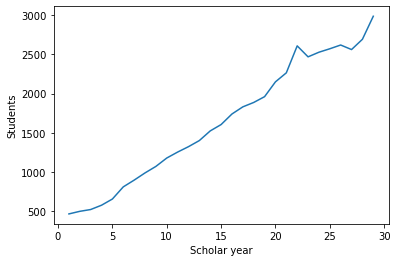

In [97]:
plt.xlabel('Scholar year')
plt.ylabel('Students')
plt.plot(arima_df)

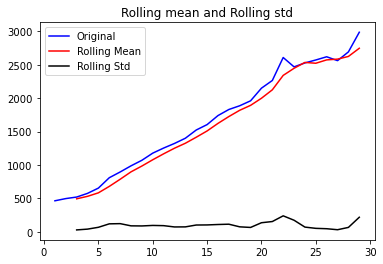

In [98]:
# We now will get the rolling mean and the rolling std and plot it with Total Sales
rolling_mean = arima_df.rolling(window = 3).mean()
rolling_std = arima_df.rolling(window = 3).std()
plt.plot(arima_df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')

plt.title('Rolling mean and Rolling std')

plt.show()

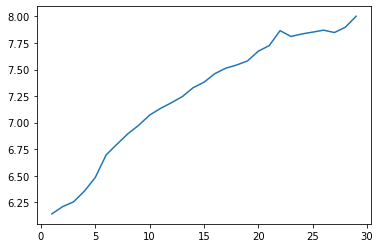

In [99]:
# Ploting the log
df_log = np.log(arima_df)
plt.plot(df_log)

In [100]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
# We will define a function that will helps us know if our time series is stationary
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and std')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['TOTAL'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

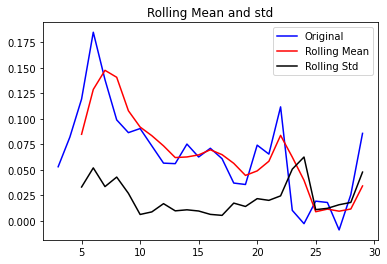

ADF Statistic: -2.1726043450824535
p-value: 0.2163382941309847
Critical Values:
	1%: -3.7112123008648155
	5%: -2.981246804733728
	10%: -2.6300945562130176


In [101]:
# We will substract the rolling mean now to render it starionaty
rolling_mean = df_log.rolling(window=3).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

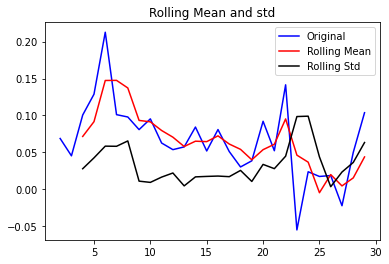

ADF Statistic: -3.5743613854627996
p-value: 0.006270529952325698
Critical Values:
	1%: -3.6996079738860943
	5%: -2.9764303469999494
	10%: -2.627601001371742


In [102]:
# We will now try to substract the point that preceed any given point to look for a better solution
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



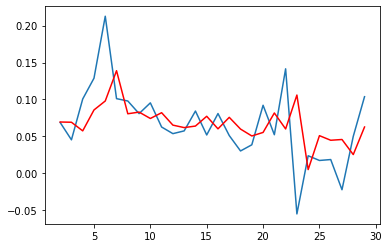

In [103]:
# We will create an Arima model with an autoregressive model
decomposition = seasonal_decompose(df_log, period=1) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

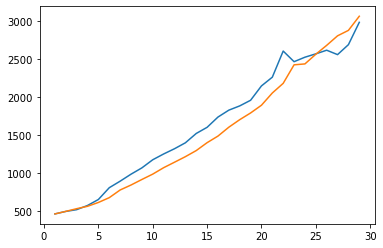

In [104]:
# We will now compare that model with our original series
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['TOTAL'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(arima_df)
plt.plot(predictions_ARIMA)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



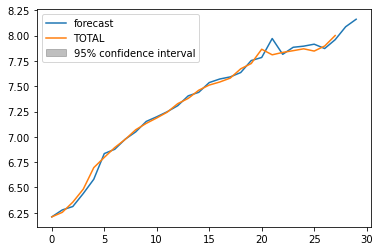

In [105]:
# Now we can predict the Total Sales for the next year
results.plot_predict(1,30)
plt.savefig('Light networks')

# schools high school

In [106]:
schools_TS=schools[(schools["LEVEL"]== "HIGH SCHOOL") & (schools["TYPE"]=="PRIVATE")]
schools_TS.head()
TS_I=schools_TS.groupby("REGION",as_index=False).sum()
TS_II=TS_I.set_index("REGION").transpose()
TS_II["TOTAL"]=TS_II["CENTER"]+TS_II["NORTH"]+TS_II["NORTH CENTER"]+TS_II["SOUTH"]
TS_II["TOTAL"].count()


29

In [107]:
# First we convert the columns we need into lists
month_list = list(range(1, 30))
school_list = TS_II['TOTAL'].tolist()

# With those lists, we will create our Data Frame
arima_df = pd.DataFrame()
arima_df['Month'] = month_list
arima_df['TOTAL'] = school_list
arima_df = arima_df.set_index('Month')
arima_df.head()

,TOTAL
Month,
1,2977
2,3139
3,3343
4,3512
5,3621


In [108]:
# We now will get the rolling mean and the rolling std and plot it with Total Sales
rolling_mean = arima_df.rolling(window = 3).mean()
rolling_std = arima_df.rolling(window = 3).std()
# Ploting the log
df_log = np.log(arima_df)


In [109]:
# We will define a function that will helps us know if our time series is stationary
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and std')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['TOTAL'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

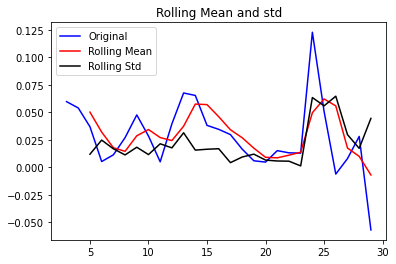

ADF Statistic: -3.1263646516926937
p-value: 0.02466261762043333
Critical Values:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373


In [110]:
# We will substract the rolling mean now to render it starionaty
rolling_mean = df_log.rolling(window=3).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

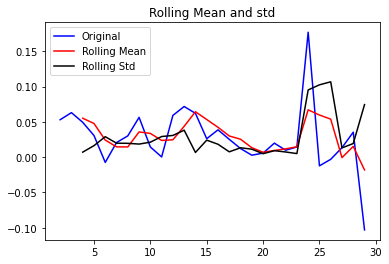

ADF Statistic: -3.075828849443593
p-value: 0.028394447340561273
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [111]:
# We will now try to substract the point that preceed any given point to look for a better solution
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



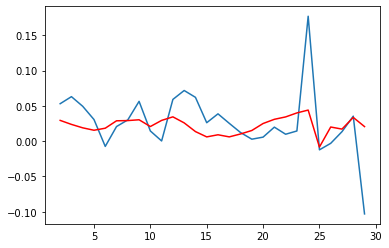

In [112]:
# We will create an Arima model with an autoregressive model
decomposition = seasonal_decompose(df_log, period=1) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

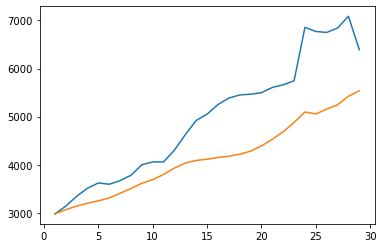

In [113]:
# We will now compare that model with our original series
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['TOTAL'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(arima_df)
plt.plot(predictions_ARIMA)

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/carlosalvarez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



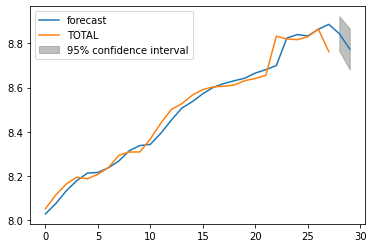

In [114]:
# Now we can predict the  for the next year
results.plot_predict(1,30)
plt.savefig('Light networks_II')

# k means classification (unsupervised learning)

In [115]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing,neighbors
from sklearn.cluster import KMeans


from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [116]:
path_censo2020 = os.path.join('..', 'Light networks', 'z_2_censo2020_limpio.csv')
censo2020= pd.read_csv(path_censo2020,low_memory=False,encoding='utf-8-sig')
censo2020.head()

,Unnamed: 0,Periodo,NOM_ENT,REGION,NOM_ENT_MUN,ENTIDAD,MUN,NOM_MUN,LOC,NOM_LOC,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,2020,Aguascalientes,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,1,Aguascalientes,1,Aguascalientes,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
1,1,2020,Aguascalientes,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,1,Aguascalientes,94,Granja Adelita,...,0,0,0,0,0,0,0,0,0,1
2,2,2020,Aguascalientes,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,1,Aguascalientes,96,Agua Azul,...,11,4,5,2,1,0,1,6,0,1
3,3,2020,Aguascalientes,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,1,Aguascalientes,102,Los Arbolitos [Rancho],...,0,0,0,0,0,0,0,0,0,1
4,4,2020,Aguascalientes,CENTRO NORTE,"Aguascalientes , Aguascalientes",1,1,Aguascalientes,104,Ardillas de Abajo (Las Ardillas),...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='P18A24A', ylabel='VPH_INTER'>

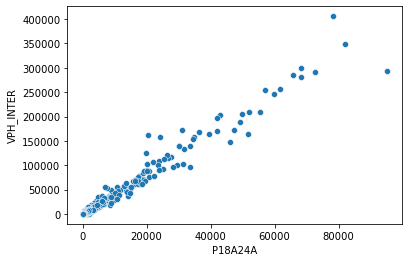

In [117]:
hs_pc=censo2020[["P18A24A","VPH_INTER"]]
sns.scatterplot(data=hs_pc, x="P18A24A", y="VPH_INTER")

In [118]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(hs_pc)
predicted_clusters = kmeans.predict(hs_pc)

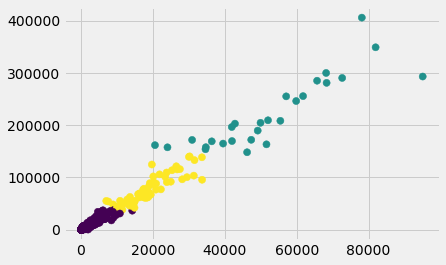

In [136]:
# Plot the clusters
plt.scatter(hs_pc["P18A24A"], hs_pc["VPH_INTER"], c=predicted_clusters, s=50, cmap='viridis')
plt.savefig('Light networks_VI')
plt.show()


In [120]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(hs_pc)
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [121]:
kmeans.inertia_

44891.92780805398

In [122]:
kmeans.cluster_centers_

array([[-1.74307679e-02, -1.73664153e-02],
       [ 7.76317458e+01,  7.58313169e+01],
       [ 2.77438659e+01,  2.81220165e+01]])

In [123]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

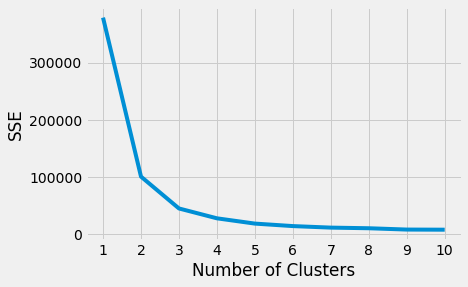

In [124]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [125]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [126]:
# REGRESSiON

In [127]:
from sklearn.datasets import make_regression

In [128]:
# Assign the data to X and y

X = censo2020[["VPH_PC","VPH_INTER"]]
y = censo2020["P18A24A"].values.reshape(-1, 1)
print(X.shape, y.shape)

(189432, 2) (189432, 1)


In [129]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [130]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [131]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9756550051444365
Testing Score: 0.9573085144695831


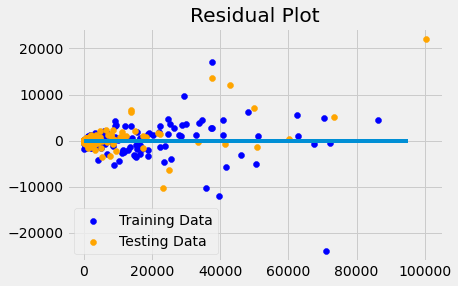

In [132]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig('Light networks_III')
### END SOLUTION

In [133]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 26309.81927461516, R2: 0.9573085144695831


correlation is 0.99


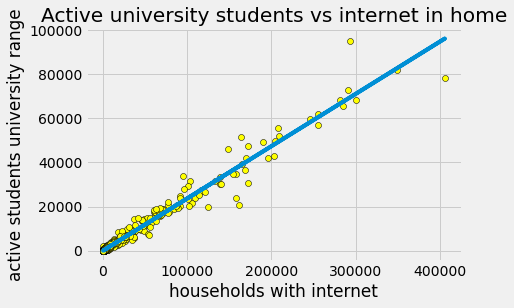

In [134]:
# Calculate the correlation coefficient and linear regression model 
import scipy.stats as st
x_axis = censo2020["VPH_INTER"]
y_axis = censo2020["P18A24A"]

corr_value = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"correlation is {corr_value}")

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="yellow", edgecolors="black")
plt.title("Active university students vs internet in home")
plt.xlabel("households with internet")
plt.ylabel("active students university range")
plt.plot(x_axis,fit,"-")
plt.savefig('Light networks_IV')
plt.show()